## Program to calculate the histogram of movie ratings

Import what we need

SparkContext - allows to create RDDs

Sparkconf - configure SparkContext, run on cluster/computer

In [22]:
from pyspark import SparkConf, SparkContext
import collections
from IPython.display import Image

setting up conf and pyspark

setmaster -  set on local path

In [27]:
conf = SparkConf().setMaster("local").setAppName("RatingsHistogram")
sc = SparkContext(conf = conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=RatingsHistogram, master=local) created by __init__ at <ipython-input-8-1b33eec8ad1c>:2 

Calculate the data count based on ratings

* lambda func maps lines to ratings one to one.
* splits the line on whitespace and selects second value
* countByValue counts the integers and generate a key-value pair

In [28]:
lines = sc.textFile("/home/ebby/Documents/Spark Courses/Getting Started with spark - Udemy/data/ml-100k/u.data")
ratings = lines.map(lambda x: x.split()[2])
result = ratings.countByValue()


#### Sort the items and print it out

* It is plain python
* sort results by key

In [29]:
sortedResults = collections.OrderedDict(sorted(result.items()))
for key, value in sortedResults.items():
    print("%s %i" % (key, value))


1 6110
2 11370
3 27145
4 34174
5 21201


Spark is written using a script. It is given to a master node and it decides how to run it in the cluster. 

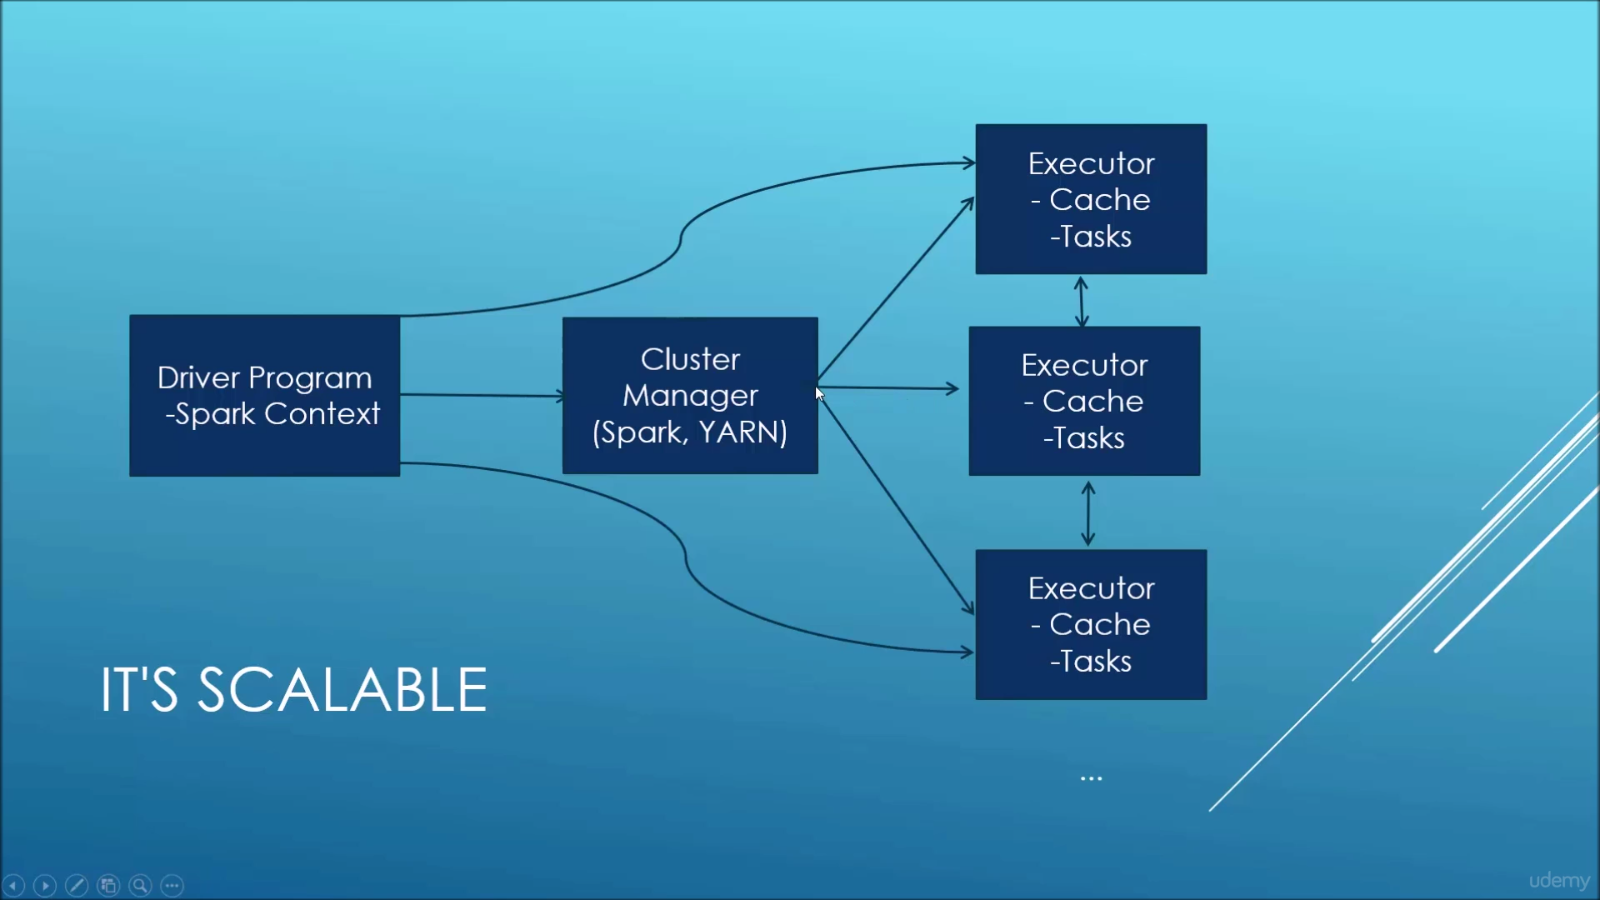

In [24]:
Image(filename='data/Spark Cluster.png') 

Ideally it should be having one executor per CPU. It also takes care of fault tolerance.

Spark optimizes through DAG(Directed Acyclic Graphs). At the end of pgm, when you run it, it optimizes and finds the optimum number of steps needed to run the pgm.

Spark allows you to code in Java, Python or Scala.

Build around RDD(Resilient Distributed Dataset).

In [ ]:
Image(filename='data/Spark Components.png')

Streaming - analyze real time data streams

Spark Sql - run structured queries

MLLib - machine learning algorithms

GraphX -  social graphs like on facebook, helps manage.

Spark is written in Scala.

Python is a lot similar with Scala.

resilient - ability to recover your data quickly(in case of node failures).

## Transforming RDDs

Map - every entry gets one to one mapping in new RDD
Flapmap - every entry can have multiple values.
filter - filter out results

##### lambda

* Spark is centred around functional programming.
* Many rdd methods accept function as a parameter
 * rdd.map(lambda x: x*x)


## Actions on RDDs

to get a result out of a rdd

Nothing actually happens until an action is called
* collect - dumps out all values in rdd
* count 
* countByvalue - counts by unique value
* take,top - some sample values
* reduce - combine for different key values.
